In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import api_key
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [50]:
# Create base URL for open weather map API call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

name_city = []
clouds = []
countries = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

# Create record counter initialized at 1.
record = 1

# Print statement for log.
print("Beginning Data Retrieval")
print('-'*25)

# Loop through all cities in cities list.
for city in cities:
    
    # Try statement to append calls where values are found.
    try:
        response = requests.get(f'{base_url}&q={city}').json()
        name_city.append(response['name'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        
        print(f'Processing Record {record} | {city}')
        
        # Increase record counter.
        record += 1
        
        # Do not exceed API call limit.
        time.sleep(1.01)
        
    # If no record found for city, then skip.
    except:
        print('City not found. Skipping...')
    continue

Beginning Data Retrieval
-------------------------
City not found. Skipping...
Processing Record 1 | provideniya
Processing Record 2 | hilo
Processing Record 3 | torbay
Processing Record 4 | prado
Processing Record 5 | kirakira
Processing Record 6 | kalabo
Processing Record 7 | santiago del estero
Processing Record 8 | puerto ayora
Processing Record 9 | rikitea
Processing Record 10 | grindavik
Processing Record 11 | bathsheba
Processing Record 12 | kousseri
Processing Record 13 | atuona
Processing Record 14 | adrar
Processing Record 15 | kaitangata
Processing Record 16 | georgetown
Processing Record 17 | hirara
Processing Record 18 | hithadhoo
Processing Record 19 | vila velha
Processing Record 20 | vaini
Processing Record 21 | mataura
Processing Record 22 | cherskiy
Processing Record 23 | cape town
Processing Record 24 | houma
Processing Record 25 | porto belo
Processing Record 26 | kahului
Processing Record 27 | tuktoyaktuk
Processing Record 28 | barrow
Processing Record 29 | minab
P

Processing Record 231 | cidreira
Processing Record 232 | hurup
Processing Record 233 | qitaihe
City not found. Skipping...
City not found. Skipping...
Processing Record 234 | benghazi
Processing Record 235 | chapais
Processing Record 236 | cabo san lucas
Processing Record 237 | dryden
Processing Record 238 | carutapera
Processing Record 239 | tual
Processing Record 240 | mount gambier
Processing Record 241 | paratinga
City not found. Skipping...
Processing Record 242 | muroto
Processing Record 243 | beisfjord
Processing Record 244 | sao joao da barra
City not found. Skipping...
Processing Record 245 | pasni
Processing Record 246 | anadyr
City not found. Skipping...
Processing Record 247 | namatanai
Processing Record 248 | san quintin
Processing Record 249 | jizan
Processing Record 250 | taman
Processing Record 251 | paamiut
Processing Record 252 | butaritari
Processing Record 253 | rosarno
Processing Record 254 | ibra
Processing Record 255 | daru
Processing Record 256 | sun city west
P

Processing Record 464 | tsnori
Processing Record 465 | san jeronimo
City not found. Skipping...
Processing Record 466 | sterling
Processing Record 467 | banepa
Processing Record 468 | ruteng
Processing Record 469 | gasa
Processing Record 470 | husavik
Processing Record 471 | padang
Processing Record 472 | graaff-reinet
Processing Record 473 | emet
Processing Record 474 | sangolqui
Processing Record 475 | balkanabat
Processing Record 476 | havoysund
Processing Record 477 | yakima
Processing Record 478 | rabo de peixe
Processing Record 479 | fernley
City not found. Skipping...
Processing Record 480 | ilulissat
Processing Record 481 | borodino
Processing Record 482 | yambio
Processing Record 483 | bilma
Processing Record 484 | nazarovo
Processing Record 485 | yongan
Processing Record 486 | ulaangom
City not found. Skipping...
Processing Record 487 | el alto
Processing Record 488 | lusambo
Processing Record 489 | conakry
Processing Record 490 | niltepec
Processing Record 491 | balakovo
Pro

In [51]:
# Create values dictionary from API call lists.
weatherdata = {
    'City': name_city,
    'Cloudiness': clouds,
    'Country': countries,
    'Date': dates,
    'Humidity': humidities,
    'Lat': lats,
    'Lng': lngs,
    'Max Temperature': max_temps,
    'Wind Speed': wind_speeds
}

df_weather = pd.DataFrame(weatherdata)

df_weather.count()

City               562
Cloudiness         562
Country            562
Date               562
Humidity           562
Lat                562
Lng                562
Max Temperature    562
Wind Speed         562
dtype: int64

In [9]:
# Save csv file
df_weather.to_csv('weather_data.csv')

The below figure is plotting max temperatures reported by latitude. The scatter plot shows a slight increase in temperature as the latitude approaches the equator, and then a significant decrease in temperature as the latitude continues increasing.


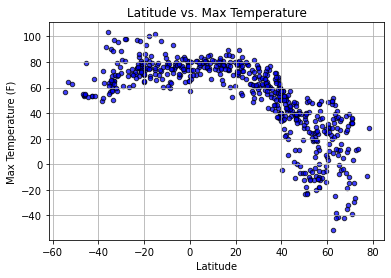

In [97]:
# Create scatter plot for Lat vs Max Temperature.
plt.scatter(df_weather['Lat'], df_weather['Max Temperature'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)
plt.title('Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
print("The below figure is plotting max temperatures reported by latitude. The scatter plot shows a slight increase in temperature as the latitude approaches the equator, and then a significant decrease in temperature as the latitude continues increasing.")

# Save Image
plt.savefig('Max_Temp_vs_Lat.png')

plt.show()

The below figure is plotting humidity by latitude. The trend shows a wide variation in humidity, with no specific trend in the relationship betwen latitude and humidity.


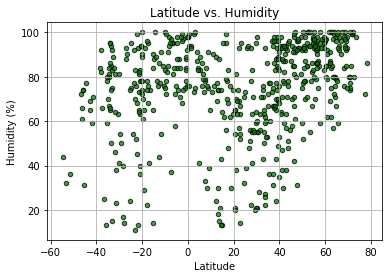

In [96]:
# Create scatter plot for Lat vs Humidity
plt.scatter(df_weather['Lat'], df_weather['Humidity'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)
plt.title('Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
print("The below figure is plotting humidity by latitude. The trend shows a wide variation in humidity, with no specific trend in the relationship betwen latitude and humidity.")

# Save Image
plt.savefig('Humidity_vs_Lat.png')

plt.show()

The below figure is plotting cloudiness by latitude. The trend shows a wide variation in cloudiness by latitude, with no specific trend in the relationship apparent.


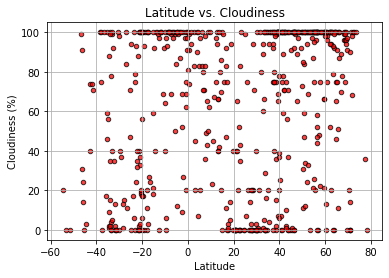

In [94]:
# Create scatter plot for Lat vs Cloudiness
plt.scatter(df_weather['Lat'], df_weather['Cloudiness'], marker='o', s=20, c='r', edgecolors='black', alpha=.75)
plt.title('Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
print("The below figure is plotting cloudiness by latitude. The trend shows a wide variation in cloudiness by latitude, with no specific trend in the relationship apparent.")

# Save Image
plt.savefig('Cloudiness_vs_Lat.png')

plt.show()

The below figure is plotting wind speed by latitude. The trend shows a wide variation in wind speed by latitude, with no specific trend in the relationship apparent.


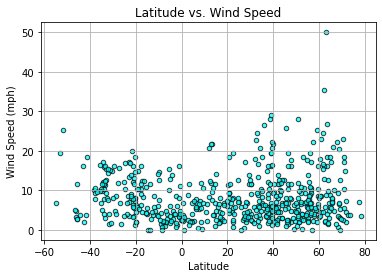

In [95]:
# Create scatter plot for Lat vs Wind Speed
plt.scatter(df_weather['Lat'], df_weather['Wind Speed'], marker='o', s=20, c='cyan', edgecolors='black', alpha=.75)
plt.title('Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
print("The below figure is plotting wind speed by latitude. The trend shows a wide variation in wind speed by latitude, with no specific trend in the relationship apparent.")


# Save Image
plt.savefig('Windspeed_vs_Lat.png')

plt.show()

In [54]:
#Show DataFrame
df_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,Provideniya,100,RU,1669583661,80,64.3833,-173.3000,23.11,6.71
1,Hilo,40,US,1669583662,74,19.7297,-155.0900,80.26,5.99
2,Torbay,100,CA,1669583664,96,47.6666,-52.7314,41.58,16.11
3,Prado,100,BR,1669583659,95,-17.3411,-39.2208,75.07,12.48
4,Kirakira,92,SB,1669583666,76,-10.4544,161.9205,83.07,5.93


In [37]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df_weather.loc[pd.to_numeric(df_weather["Lat"]).astype(float) > 0, :]
southern_df = df_weather.loc[pd.to_numeric(df_weather["Lat"]).astype(float) < 0, :]

The r-squared is: -0.8394526150080222
The plot shows a strong negative correlation between latitude and temperature in the northern hemisphere. As latitude increases, the temperature decreases.


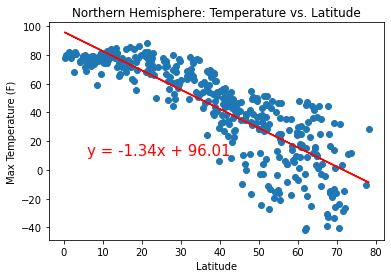

In [82]:
#Northern Temp vs Lat
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Temperature vs. Latitude')
print(f"The r-squared is: {rvalue}")
print("The plot shows a strong negative correlation between latitude and temperature in the northern hemisphere. As latitude increases, the temperature decreases.")
plt.show()

The r-squared is: 0.5591022001037258
The plot shows a positive correlation between latitude and temperature in the southern hemisphere. As latitude increases, the temperature increases.


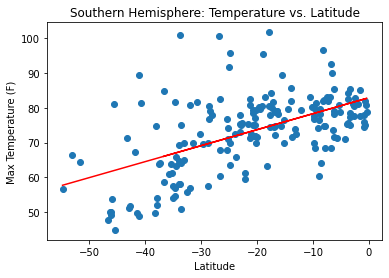

In [83]:
#Southern Temp vs Lat
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Temperature vs. Latitude')
print(f"The r-squared is: {rvalue}")
print("The plot shows a positive correlation between latitude and temperature in the southern hemisphere. As latitude increases, the temperature increases.")
plt.show()

The r-squared is: 0.3879047979720402
The plot shows a weak correlation between latitude and humidity in the northern hemisphere.


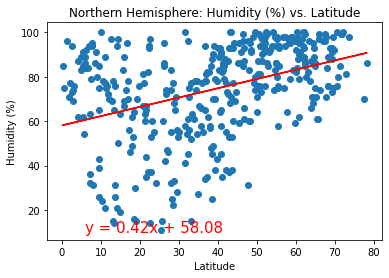

In [84]:
#Northern Humidity vs Lat
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Humidity (%) vs. Latitude')
print(f"The r-squared is: {rvalue}")
print("The plot shows a weak correlation between latitude and humidity in the northern hemisphere.") 
plt.show()

The r-squared is: 0.22353608951685042
The plot shows a very weak positive correlation between latitude and humidity in the southern hemisphere.


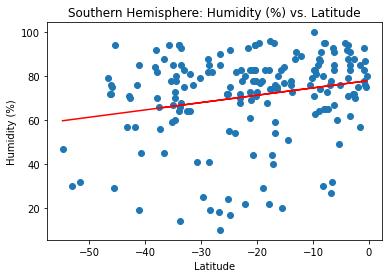

In [85]:
#Southern Humidity vs Lat
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Humidity (%) vs. Latitude')
print(f"The r-squared is: {rvalue}")
print("The plot shows a very weak positive correlation between latitude and humidity in the southern hemisphere.")
plt.show()

The r-squared is: 0.2134549806147956
The plot shows a weak positive correlation between latitude and cloudiness in the northern hemisphere. As latitude increases, cloudiness increases.


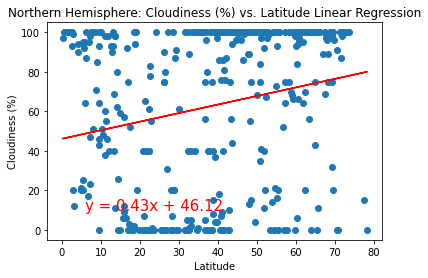

In [86]:
#Northern Cloudiness vs Lat
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The plot shows a weak positive correlation between latitude and cloudiness in the northern hemisphere. As latitude increases, cloudiness increases.")
plt.show()


The r-squared is: 0.30999487322784053
The plot shows a very weak positive correlation between latitude and humidity in the southern hemisphere.


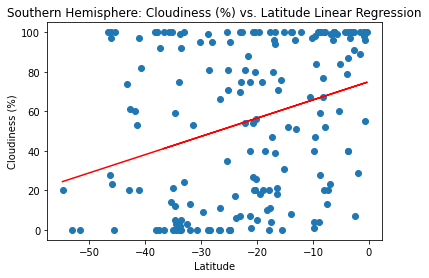

In [77]:
#Southern Cloudiness vs Lat
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The plot shows a weak positive correlation between latitude and humidity in the southern hemisphere.")
plt.show()

The r-squared is: 0.04910309717015126
The plot shows no correlation between latitude and wind speed in the nothern hemisphere.


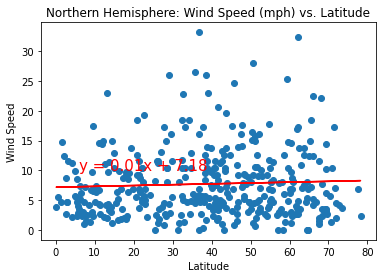

In [88]:
#Northern Wind Speed vs Lat
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Wind Speed (mph) vs. Latitude')
print(f"The r-squared is: {rvalue}")
print("The plot shows no correlation between latitude and wind speed in the nothern hemisphere.")
plt.show()

The r-squared is: -0.28558015577999424
The plot shows a weak negative correlation between latitude and wind speed in the southern hemisphere. As latitude increases, wind speed decreases.


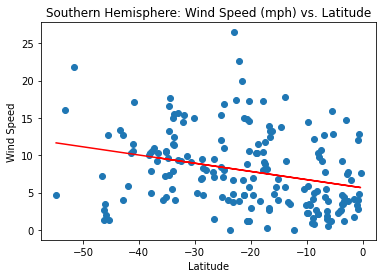

In [90]:
#Southern Wind Speed vs Lat
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Wind Speed (mph) vs. Latitude')
print(f"The r-squared is: {rvalue}")
print("The plot shows a weak negative correlation between latitude and wind speed in the southern hemisphere. As latitude increases, wind speed decreases.")
plt.show()